<a href="https://colab.research.google.com/github/salomeeja/algo_trading/blob/main/Multiple_assets_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance 


     |████████████████████████████████| 6.4 MB 18.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Import

In [3]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 

Create multiple stock dataframe

In [4]:
symbols = ['GNRC', 'DXCM', 'AMD', 'NFLX', 'COST','TGT', 'AES', 'MSCI', 'NEM', 'AMT', 'HES']
df = yf.download(symbols, start = '2018-01-01', end = '2021-09-01')

[*********************100%***********************]  11 of 11 completed


In [5]:
df = df['Adj Close']
df

,AES,AMD,AMT,COST,DXCM,GNRC,HES,MSCI,NEM,NFLX,TGT
Date,,,,,,,,,,,
2018-01-02,9.545205,10.980000,130.570358,176.976303,57.990002,48.029999,44.593998,122.792107,34.176994,201.070007,61.324657
2018-01-03,9.536433,11.550000,131.079163,179.100159,58.080002,49.730000,46.038528,124.657845,33.890392,205.050003,60.907524
2018-01-04,9.501341,12.120000,129.164062,177.709351,52.250000,50.070000,47.147552,126.619743,34.266548,205.630005,59.710609
2018-01-05,9.536433,11.880000,129.996735,176.440674,53.259998,50.410000,48.610722,127.937317,34.391945,209.990005,60.345360
2018-01-08,9.536433,12.280000,131.384506,177.126694,55.439999,49.529999,48.918259,128.110397,34.356117,212.050003,60.916607
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,24.114227,108.300003,280.194977,450.501190,517.559998,425.869995,68.873009,626.909668,55.823093,547.580017,250.294861
2021-08-26,23.726572,107.269997,280.472321,448.584290,517.059998,427.470001,66.946075,622.916016,55.548443,550.119995,248.112335
2021-08-27,24.044649,111.400002,282.770142,449.612610,520.710022,437.109985,69.379578,628.587036,57.078644,558.919983,248.331573


Plot Stocks

In [6]:
df[:3]

,AES,AMD,AMT,COST,DXCM,GNRC,HES,MSCI,NEM,NFLX,TGT
Date,,,,,,,,,,,
2018-01-02,9.545205,10.98,130.570358,176.976303,57.990002,48.029999,44.593998,122.792107,34.176994,201.070007,61.324657
2018-01-03,9.536433,11.55,131.079163,179.100159,58.080002,49.730000,46.038528,124.657845,33.890392,205.050003,60.907524
2018-01-04,9.501341,12.12,129.164062,177.709351,52.250000,50.070000,47.147552,126.619743,34.266548,205.630005,59.710609


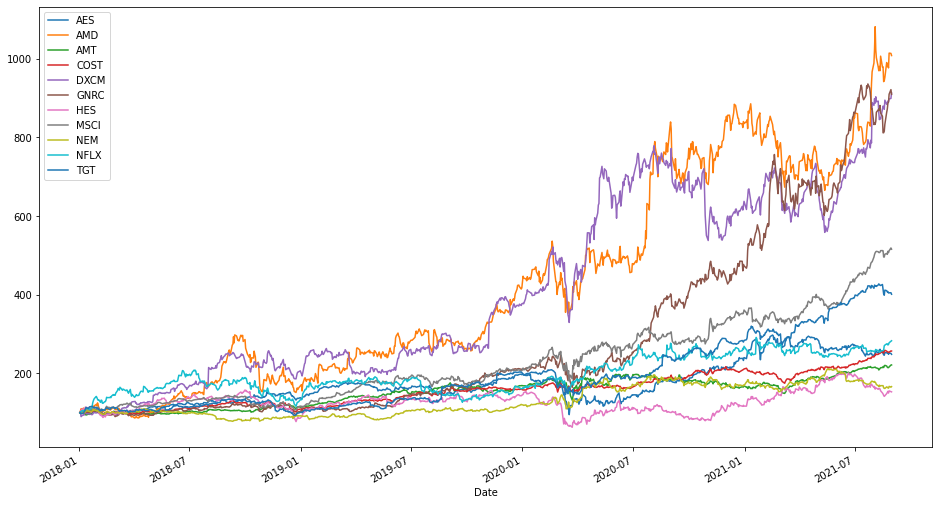

In [8]:
(df / df.iloc[0] * 100).plot(figsize=(16,9))
#100 rom ceria gvichvenebs rom tavidan 100 dlari girda kvela da mas shemdeg kvela rogor gaizarda

In [9]:
returns = np.log(df / df.shift(1))
mean_return = returns.mean() * 252
#252 samushao dgea celshi

mean_return

AES     0.248872
AMD     0.631621
AMT     0.217512
COST    0.257942
DXCM    0.604448
GNRC    0.603505
HES     0.116467
MSCI    0.448482
NEM     0.139238
NFLX    0.284405
TGT     0.379835
dtype: float64

In [10]:
returns.cov() * 252

,AES,AMD,AMT,COST,DXCM,GNRC,HES,MSCI,NEM,NFLX,TGT
AES,0.144203,0.055266,0.042063,0.025596,0.043813,0.065557,0.093453,0.062098,0.021986,0.032133,0.038466
AMD,0.055266,0.312655,0.041158,0.047267,0.093411,0.086732,0.083106,0.094960,0.035442,0.102382,0.057842
AMT,0.042063,0.041158,0.080622,0.030208,0.036803,0.042595,0.037882,0.047314,0.020820,0.030778,0.028514
COST,0.025596,0.047267,0.030208,0.048673,0.029274,0.036132,0.024969,0.036591,0.013200,0.038660,0.033987
DXCM,0.043813,0.093411,0.036803,0.029274,0.235140,0.060096,0.057642,0.080755,0.021077,0.064031,0.030436
GNRC,0.065557,0.086732,0.042595,0.036132,0.060096,0.158348,0.080517,0.068081,0.025463,0.051556,0.041750
HES,0.093453,0.083106,0.037882,0.024969,0.057642,0.080517,0.295001,0.069566,0.029886,0.043042,0.040944
MSCI,0.062098,0.094960,0.047314,0.036591,0.080755,0.068081,0.069566,0.121828,0.026417,0.063980,0.034737
NEM,0.021986,0.035442,0.020820,0.013200,0.021077,0.025463,0.029886,0.026417,0.107179,0.014270,0.009445
NFLX,0.032133,0.102382,0.030778,0.038660,0.064031,0.051556,0.043042,0.063980,0.014270,0.169375,0.031428


Correlation

In [11]:
corr_df = returns.corr()

In [12]:
corr_df

,AES,AMD,AMT,COST,DXCM,GNRC,HES,MSCI,NEM,NFLX,TGT
AES,1.000000,0.260278,0.390111,0.305520,0.237933,0.433836,0.453100,0.468507,0.176847,0.205607,0.323713
AMD,0.260278,1.000000,0.259238,0.383158,0.344512,0.389800,0.273646,0.486557,0.193611,0.444906,0.330589
AMT,0.390111,0.259238,1.000000,0.482230,0.267300,0.376990,0.245637,0.477404,0.223973,0.263381,0.320932
COST,0.305520,0.383158,0.482230,1.000000,0.273634,0.411566,0.208372,0.475181,0.182755,0.425783,0.492316
DXCM,0.237933,0.344512,0.267300,0.273634,1.000000,0.311443,0.218857,0.477127,0.132769,0.320851,0.200589
GNRC,0.433836,0.389800,0.376990,0.411566,0.311443,1.000000,0.372538,0.490167,0.195455,0.314808,0.335296
HES,0.453100,0.273646,0.245637,0.208372,0.218857,0.372538,1.000000,0.366953,0.168073,0.192557,0.240907
MSCI,0.468507,0.486557,0.477404,0.475181,0.477127,0.490167,0.366953,1.000000,0.231179,0.445393,0.318046
NEM,0.176847,0.193611,0.223973,0.182755,0.132769,0.195455,0.168073,0.231179,1.000000,0.105913,0.092195
NFLX,0.205607,0.444906,0.263381,0.425783,0.320851,0.314808,0.192557,0.445393,0.105913,1.000000,0.244043


Plot correlation matrix

<Figure size 432x288 with 0 Axes>

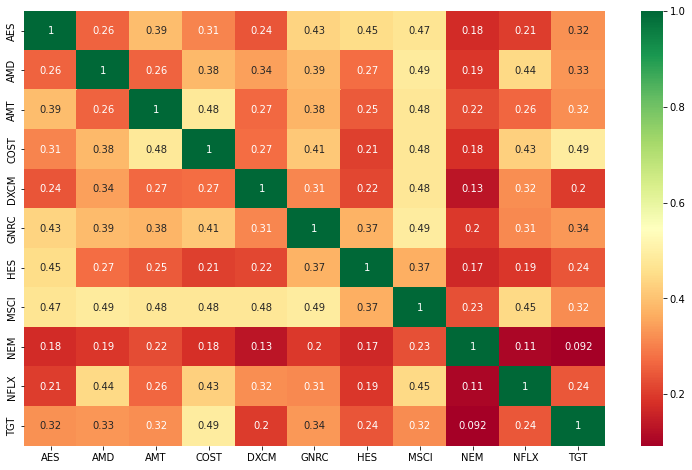

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(13,8))
seaborn.heatmap(corr_df, annot=True, cmap='RdYlGn')
plt.figure()

Generate random weights (sum=1)

In [19]:
weights = np.random.random(len(symbols))
weights = weights / np.sum(weights)
print(weights)
print('')
print(sum(weights))

[0.05937129 0.01374662 0.10315787 0.11978287 0.04239092 0.07646066
 0.04931605 0.15279728 0.14366329 0.11931949 0.11999368]

1.0


Calculate return for portfolio

In [20]:
np.sum(weights * returns.mean()) * 252

0.3223479513904244

In [21]:
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))


0.21627244142356258

analyzing returns and risks of 10k combinations

In [23]:
p_ret = []
p_vol = []
p_SR = []
p_wt = []

for x in range(10000):
  #geberate random weights
  p_weights = np.random.random(len(symbols))
  p_weights =  p_weights / np.sum(p_weights)

  #add weights using those random weights
  ret_1 = np.sum(p_weights * returns.mean()) * 252
  p_ret.append(ret_1)

  #add volativity or standart deviation to list
  vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
  p_vol.append(vol_1)

  #get sharp ratio
  SR_1 = ret_1 / vol_1
  p_SR.append(SR_1)

  #store weights for each portf
  p_wt.append(p_weights)

#convert to numpy array
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt= np.array(p_wt)



In [24]:
len(p_ret)

10000

PLOT THE EFFICENT FRONTIER

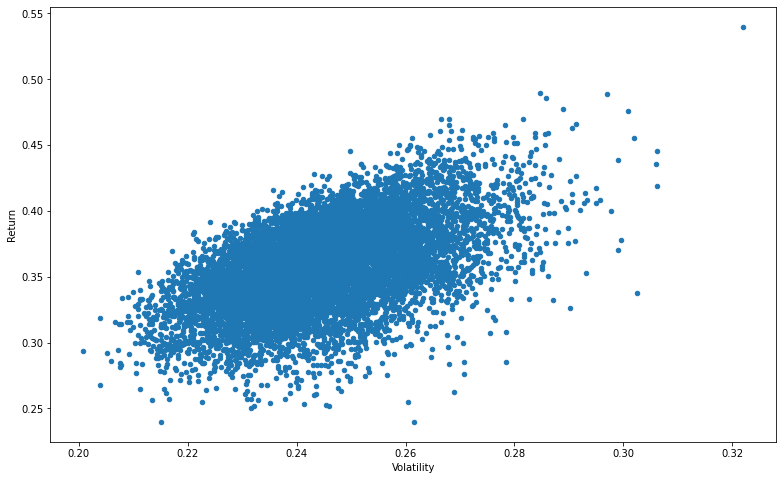

In [28]:
#CREATE DATAFRAME WITH RETURNS AND VOLATILITY
ports = pd.DataFrame({'Return': p_ret, 'Volatility': p_vol})

ports.plot(x='Volatility', y='Return', kind='scatter', figsize=(13,8))

find max sharp ratio

In [32]:
#return the index of the largest sharp ratio

SR_idx = np.argmax(p_SR)

#find the ideal portfolio weights at that index

i = 0
while i < len(symbols):
  print('Stock : %s : %2.2f' % (symbols[i], (p_wt[SR_idx][i] * 100)))
  i += 1


#find the returns of the portfolio
print('\nReturn :', p_ret[SR_idx])

#find volatility of the portf
print('Volatility :', p_vol[SR_idx])

print('Sharp Ratio :', p_SR[SR_idx])

Stock : GNRC : 3.89
Stock : DXCM : 11.00
Stock : AMD : 7.68
Stock : NFLX : 11.36
Stock : COST : 18.46
Stock : TGT : 21.24
Stock : AES : 0.25
Stock : MSCI : 5.60
Stock : NEM : 9.23
Stock : AMT : 0.85
Stock : HES : 10.43

Return : 0.4452674284570322
Volatility : 0.24974957253334235
Sharp Ratio : 1.7828556178913484
